Using the benchmarking data analyse
1. False positive (FP) predictions: non-SP sequences predicted as SPs
2. False negative (FN) predictions: SPs predicted as non-SPs
In general:
3. Are the errors (both FP and FN) equally distributed among taxa/species?

#### 1. FALSE POSITIVE
* Using metadata extracted from UniProtKB, compute the fraction of FP predictions that have a transmembrane helix in the first 90 residues.

#### 2. FALSE NEGATIVE
2.1. von-Heijne method:
* For all FN in the benchmark, compute the corresponding LOGO and compare it with the expected one (original)
2.2. For the SVM method:
* Compare compositions of positive examples from training sets up to K residues, benchmarking true positives up to K and benchmarking false negatives up to K
* Compare length distributions of positive training examples, benchmarking true positives and benchmarking false negatives
* Compare distributions of all features adopted

## Cross-validation

Comparison between VH and SVM.

In the VH you not optimize anything so you have obtained a set of measures, you do the mean for all the runs of cross-validation and then you compute the standard error. (15 residues: 2 after the clevage and 13 before, clevage site included)

FROM THE CROSS_VALIDATION Von Heijne
* The average threshold is: 9.197006408548381
* Accuracy: 0.938 ± 0.002
* Sensitivity (recall): 0.719 ± 0.027
* PPV (precision): 0.724 ± 0.021
* F1 Score: 0.717 ± 0.007
* MCC: 0.685 ± 0.008

FROM THE CROSS_VALIDATION SVM
* model: ['cc', 'tm', 'ch']
* C: 8
* gamma: 2.5
* Accuracy: 0.972 ± 0.003
* Precision: 0.868 ± 0.020
* Recall: 0.878 ± 0.011
* F1 Score: 0.873 ± 0.014
* MCC: 0.857 ± 0.015

Better a more precise method if they have the same MCC because better to be sure in the detection than having all the positive one.


## Benchmarking

Von Heijne
* Accuracy: 0.929
* Sensitivity (recall): 0.705
* PPV (precision): 0.665
* F1 Score: 0.685
* MCC: 0.645 #stable respect the CV, slightly less but in line with the previous
* Overall FPR: 4.38%
* FPR transmembrane: 20.34%

SVM
* Accuracy: 0.970126582278481
* Precision: 0.8623853211009175
* Recall: 0.8663594470046083
* F1 Score: 0.864367816091954
* MCC: 0.847585537771732
* Overall FPR: 1.71% #half respect the VH
* FPR transmembrane: 10.17% #difference with the overall is still there so the model doesn't keep the difference between SP and Transmembrane.

SVM is definetly better than von Heijne.

In [ ]:
# @title Import Libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# @title Upload the files
vonHeijne = pd.read_csv('vonHeijne_final.tsv', sep='\t')
print(vonHeijne.shape)
print(vonHeijne.head())

svm = pd.read_csv('svm_final.tsv', sep='\t')
print(svm.shape)
print(svm.head())

(1975, 9)
           ID                       Species        Kingdom  Length  Cleavage  \
0  A0A023W145         Ethmostigmus rubripes        Metazoa      88      24.0   
1  A0A0B5KU17    Penicillium brevicompactum          Fungi    2190       NaN   
2  A0A0F7YZQ7               Conus victoriae        Metazoa     100      24.0   
3  A0A0G2K047             Rattus norvegicus        Metazoa     683       NaN   
4  A0A0N7KIY3  Oryza sativa subsp. japonica  Viridiplantae     352       NaN   

  Transmembrane  Class                                           Sequence  \
0           NaN      1  MASQVVLSFALVVVLAVFVGQVDSCPSDCKCDYRSSQCRPANDDVH...   
1         False      0  MNFHKGQPKEDLRVLFGPQCPDITDSITHIRDAISKDPTGLGFLTN...   
2           NaN      1  MAPSQKALLVLVLSMLLTASDSWARRIDCKVFVFAPICRGVAAKRG...   
3         False      0  MKPSWLQCRKVTGAGTLGAPLPGSPSVRGAGVARRALVAGFGGRGC...   
4         False      0  MEHHHLLLQLSPPPPPPPLPAAHLMMSPSFFDAGVFADVGGDWMED...   

   Prediction  
0           1  
1           0 

### FALSE POSITIVE

In [ ]:
# @title Computation of confusion matrix parameters
y_test_vH = vonHeijne['Class'].to_numpy()
y_pred_vH = vonHeijne['Prediction'].to_numpy()
cm_vH = confusion_matrix(y_test_vH, y_pred_vH)
TN_vH, FP_vH, FN_vH, TP_vH = cm_vH.ravel()

y_test_svm = svm['Class'].to_numpy()
y_pred_svm = svm['Prediction'].to_numpy()
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
TN_svm, FP_svm, FN_svm, TP_svm = cm_svm.ravel()

print(f'Confusion matrix von Heijne method:\n {cm_vH}\nFP: {FP_vH}\nFN: {FN_vH}')
print(f'Confusion matrix SVM method:\n {cm_svm}\nFP: {FP_svm}\nFN: {FN_svm}')

Confusion matrix von Heijne method:
 [[1681   77]
 [  64  153]]
FP: 77
FN: 64
Confusion matrix SVM method:
 [[1728   30]
 [  29  188]]
FP: 30
FN: 29


In [ ]:
# @title Computation of the false positive rates

# Overall False Positive Rate
#OPR = FP/Neg
OPR_vH = FP_vH/(FP_vH+TN_vH)
OPR_svm = FP_svm/(FP_svm+TN_svm)

# Transmembrane False Positive Rate
#tm_PR = FP(WithTransmembrane)/Neg(WithTransmembrane)
vonHeijne_tm = vonHeijne[vonHeijne['Transmembrane'] == True]
print('Transmembrane proteins (von Heijne):', vonHeijne_tm.shape)
y_test_vH_tm = vonHeijne_tm['Class'].to_numpy()
y_pred_vH_tm = vonHeijne_tm['Prediction'].to_numpy()
TN_vH_tm, FP_vH_tm, tp, fn = confusion_matrix(y_test_vH_tm, y_pred_vH_tm).ravel()

svm_tm = svm[svm['Transmembrane'] == True]
print('Transmembrane proteins (svm):', svm_tm.shape)
y_test_svm_tm = svm_tm['Class'].to_numpy()
y_pred_svm_tm = svm_tm['Prediction'].to_numpy()
TN_svm_tm, FP_svm_tm, tp, fn = confusion_matrix(y_test_svm_tm, y_pred_svm_tm).ravel()

tm_PR_vH = FP_vH_tm/(FP_vH_tm+TN_vH_tm)
tm_PR_svm = FP_svm_tm/(TN_svm_tm+FP_svm_tm)

print(f'von Heijne Method:\n Overall False Positive Rate: {OPR_vH*100:.2f}%\n Transmembrane Positive Rate: {tm_PR_vH*100:.2f}%')
print(f'SVM method:\n Overall False Positive Rate: {OPR_svm*100:.2f}%\n Transmembrane Positive Rate: {tm_PR_svm*100:.2f}%')

Transmembrane proteins (von Heijne): (177, 9)
Transmembrane proteins (svm): (177, 38)
von Heijne Method:
 Overall False Positive Rate: 4.38%
 Transmembrane Positive Rate: 20.34%
SVM method:
 Overall False Positive Rate: 1.71%
 Transmembrane Positive Rate: 10.17%


 The transmembrane positive rate is higher than the overall one: this means that you make the major part of errors in the transmembrane proteins. In the von Heine we have 20% of FP due to the transmembrane, while in the SVM only the 10% of FP is due to the Transmembrane missclassification.

In [ ]:
# @title Report the results in a file
with open('FalsePositive_analysis.txt','w')as write:
  print(f'Confusion matrix von Heijne method:\n {cm_vH}\nFP: {FP_vH}\nFN: {FN_vH}\n', file=write)
  print(f'Confusion matrix SVM method:\n {cm_svm}\nFP: {FP_svm}\nFN: {FN_svm}\n', file=write)
  print('----', file=write)
  print('Transmembrane proteins (von Heijne):', vonHeijne_tm.shape, file=write)
  print('Transmembrane proteins (svm):', svm_tm.shape, file=write)
  print('\n----\n', file=write)
  print(f'von Heijne Method:\n Overall False Positive Rate: {OPR_vH*100:.2f}%\n Transmembrane Positive Rate: {tm_PR_vH*100:.2f}%\n', file=write)
  print(f'SVM method:\n Overall False Positive Rate: {OPR_svm*100:.2f}%\n Transmembrane Positive Rate: {tm_PR_svm*100:.2f}%', file=write)
write.close

<function TextIOWrapper.close()>

### FALSE NEGATIVE

####VON HEIJNE METHOD
* For all FN in the benchmark, compute the corresponding LOGO and compare it with the expected one (original)

In [ ]:
# @title Extract only the False Negatives
#FN: Class=1, Prediction=0
FN_vh_df = vonHeijne[(vonHeijne['Class'] == 1) & (vonHeijne['Prediction'] == 0)]
print('FN:', FN_vh_df.shape)

#TP: Class=1, Prediction=1
TP_vh_df = vonHeijne[(vonHeijne['Class'] == 1) & (vonHeijne['Prediction'] == 1)]
print('TP:', TP_vh_df.shape)

FN: (64, 9)
TP: (153, 9)


In [ ]:
# Extract the region around the cleavage site to create the Sequence Logo
# False Negative
with open('positive.fasta', 'r') as read:
  with open('vh_FN_logo.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        query = FN_vh_df.query("ID == @line")['Cleavage']
        if not query.empty:
          end = int(query.iloc[0])
          line = read.readline()
          print(line[end-13:end+2], file=write)
  write.close
read.close

<function TextIOWrapper.close()>

In [ ]:
# Extract the region around the cleavage site to create the Sequence Logo
# True Positives
with open('positive.fasta', 'r') as read:
  with open('vh_TP_logo.seq', 'w') as write:
    for line in read:
      if '>' in line:
        line = line[1:].rstrip()
        query = TP_vh_df.query("ID == @line")['Cleavage']
        if not query.empty:
          end = int(query.iloc[0])
          line = read.readline()
          print(line[end-13:end+2], file=write)
  write.close
read.close

<function TextIOWrapper.close()>

The Sequence Logos are created using WebLogo

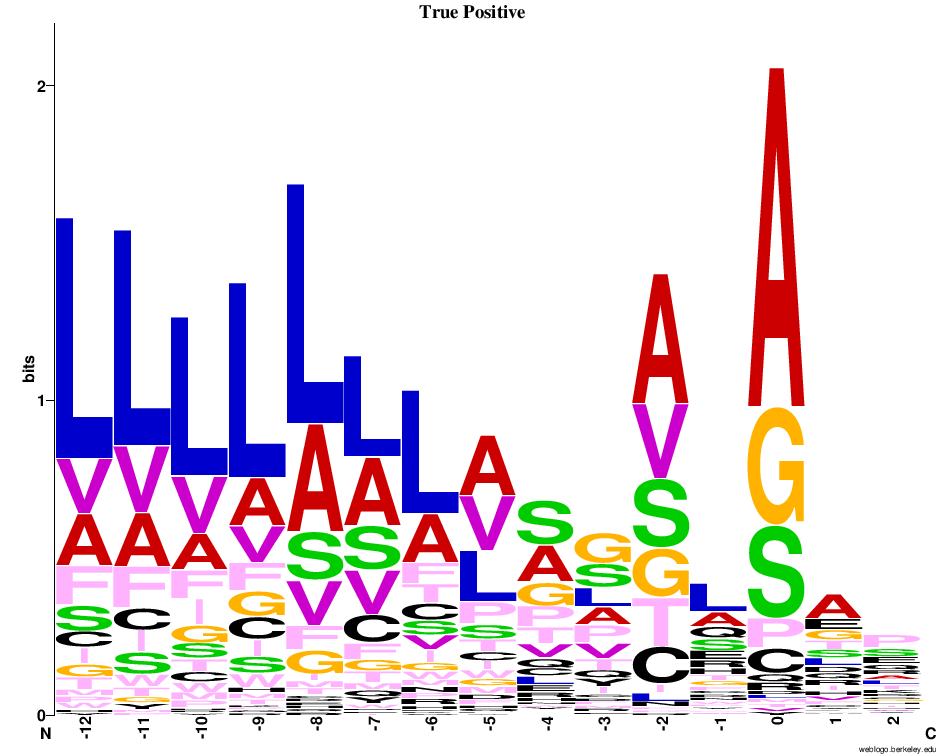

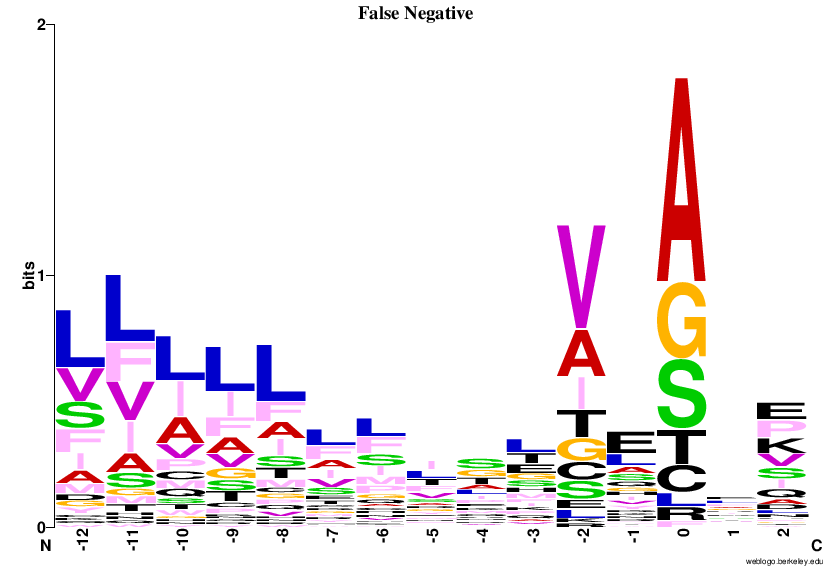

Lower ovarall information context, the representation is not as represented as in the TP. Representation not dominated by L, it has other residues with the same frequency. This means that in the cleavage site of the FN you have more variability than in the original. The Von Heijne method is computed on the logo in practice.

In general the conservation is lower in the false negatives because they are below one bit, while in the original they are over the 1 bit. The original AXA site is became VXA site and in general the leucine at the beginning is less conserved, the more frequent residues are a bit diverse and the distribution of them is more uniform than in the original one. The residues more conserved are the hydrophobic ones but are less conserved than in the original.

####SVM METHOD

In [ ]:
# @title Extract only the False Negatives
#FN: Class=1, Prediction=0
FN_svm_df = svm[(svm['Class'] == 1) & (svm['Prediction'] == 0)]
print('FN:', FN_svm_df.shape)

#TP: Class=1, Prediction=1
TP_svm_df = svm[(svm['Class'] == 1) & (svm['Prediction'] == 1)]
print('TP:', TP_svm_df.shape)

FN: (29, 38)
TP: (188, 38)


* Compare compositions of positive examples from training sets up to K residues, benchmarking true positives up to K and benchmarking false negatives up to K

In [ ]:
# @title Train Pos
# Upload the dataframe
col = ['ID','Set','Class','Sequence','G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R','X','hp_max','hp_mean','ah_max','ah_mean','tm_max','tm_mean','ch_max','ch_pos']
svm_pos_train_df = pd.read_csv('svm_pos.tsv', sep='\t', header=None, names=col)

# Calculate the composition
tot = 0
aa_pos_train = {}
for index, row in svm_pos_train_df.iterrows():
    seq = row['Sequence'][:22]
    for char in seq:
      tot += 1
      aa_pos_train[char] = aa_pos_train.get(char, 0) + 1

print(tot)
print(22*(svm_pos_train_df.shape[0]))

for k in aa_pos_train.keys():
  aa_pos_train[k] = round((aa_pos_train[k]/(tot-aa_pos_train['X']))*100,2)
  print(k,aa_pos_train[k])

19096
19096
M 6.54
G 5.38
L 21.83
Q 2.06
T 4.48
K 2.42
W 1.78
P 4.15
S 7.19
H 1.19
A 13.49
F 5.13
I 4.67
C 2.94
R 3.25
V 8.26
E 1.65
N 1.13
D 1.26
Y 1.18
X 0.05


In [ ]:
# @title Bench TP
tot = 0
aa_TP = {}
for index, row in TP_svm_df.iterrows():
    seq = row['Sequence'][:22]
    for char in seq:
      tot += 1
      aa_TP[char] = aa_TP.get(char, 0) + 1

print(tot)
print(22*(TP_svm_df.shape[0]))

for k in aa_TP.keys():
  aa_TP[k] = round((aa_TP[k]/tot)*100,2)
  print(k,aa_TP[k])

4136
4136
M 6.58
A 13.3
S 7.5
Q 2.32
V 8.87
L 22.17
F 5.46
G 5.75
P 3.48
K 2.22
T 4.86
D 0.75
C 2.85
N 1.09
H 1.16
I 4.74
E 1.67
Y 0.99
R 2.59
W 1.64


In [ ]:
# @title Bench FN
tot = 0
aa_FN = {}
for index, row in FN_svm_df.iterrows():
    seq = row['Sequence'][:22]
    for char in seq:
      tot += 1
      aa_FN[char] = aa_FN.get(char, 0) + 1

print(tot)
print(22*(FN_svm_df.shape[0]))

for k in aa_FN.keys():
  aa_FN[k] = round((aa_FN[k]/tot)*100,2)
  print(k,aa_FN[k])

638
638
M 5.8
K 2.82
F 5.96
L 16.46
I 4.86
V 5.96
P 6.43
G 6.27
N 1.57
S 7.84
C 3.29
R 5.64
H 1.25
A 10.66
D 1.88
Y 2.19
T 6.11
Q 1.88
E 2.19
W 0.94


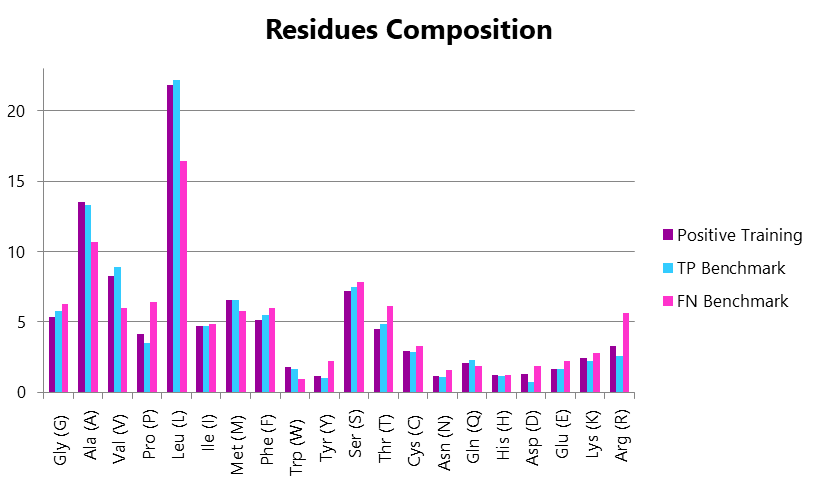

L is very represented, but in the FN are less represented, more comparable with the background one (swiss-prot) so you can't use the composition to discriminate them. Same thing for Alanine and Valine.

* Compare length distributions of positive training examples, benchmarking true positives and benchmarking false negatives

In [ ]:
# Upload the dataframes
col_pos_train = ['ID', 'Species', 'Kingdom', 'Length', 'Cleavage', 'Set']
pos_train = pd.read_csv('pos-train.tsv', sep='\t', header=None, names=col_pos_train)

# Retain only the interesting columns
pos_train_filt = pos_train[['ID', 'Cleavage']]
TP_svm_df_filt = TP_svm_df[['ID', 'Cleavage']]
FN_svm_df_filt = FN_svm_df[['ID', 'Cleavage']]

# Add the label for the class
pos_train_filt.loc[:, ['Type']] = 'Training'
TP_svm_df_filt.loc[:, ['Type']] = 'TP'
FN_svm_df_filt.loc[:, ['Type']] = 'FN'

# Checks
print(pos_train_filt.shape)
print(pos_train_filt.head())

print(TP_svm_df_filt.shape)
print(TP_svm_df_filt.head())

print(FN_svm_df_filt.shape)
print(FN_svm_df_filt.head())

(868, 3)
       ID  Cleavage      Type
0  P05113        19  Training
1  O80323        22  Training
2  Q6UX46        24  Training
3  Q76IQ4        26  Training
4  P38660        19  Training
(188, 3)
            ID  Cleavage Type
0   A0A023W145      24.0   TP
2   A0A0F7YZQ7      24.0   TP
8   A0A1S6EK92      20.0   TP
10  A0A482A9N4      21.0   TP
24      A7VN15      19.0   TP
(29, 3)
         ID  Cleavage Type
194  O61668      18.0   FN
278  O97939      38.0   FN
283  P01579      23.0   FN
289  P04062      39.0   FN
319  P08541      23.0   FN


In [ ]:
# Concatenate them to have all the data in one dataframe
df_sp_l = pd.concat([pos_train_filt, FN_svm_df_filt, TP_svm_df_filt], axis=0)

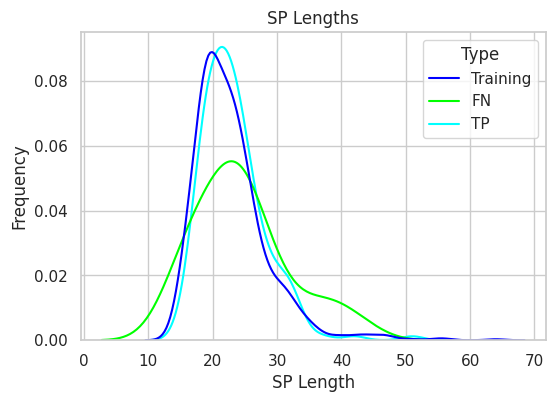

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")
custom_palette=['blue','lime','cyan','pink','purple','magenta', '#7FFFD4', '#550A35']

# Plot the distribution of protein lengths
plt.figure(figsize=(6, 4))
#sns.histplot(df_sp_l, kde=True, stat='density', common_norm=False, x='Cleavage', hue='Type', palette=custom_palette[3:])
sns.kdeplot(data=df_sp_l, common_norm=False, x='Cleavage', hue='Type', palette=custom_palette)

# Add title and labels
plt.title('SP Lengths')
plt.xlabel('SP Length')
plt.ylabel('Frequency')

# Show the plot
plt.show()

FN are shorter and longer than the TP and training. The distribution of the FN is wider.

* Compare distributions of all other features adopted

In [ ]:
def extract_df(model,df):
  """Extract the feature of interest for the model in input using the mapping dictionary"""
  mapping = {
      'cc':[i for i in range(8,29)],
      'hp':[29,30],
      'ah':[31,32],
      'tm':[33,34],
      'ch':[35,36]
  }
  in_col = []
  for m in model:
    in_col.extend(mapping[m])
  input_df = df.iloc[:, in_col]
  return input_df

In [ ]:
# Analyze the features used in the model to see if they are the cause of the missclassification of the FN samples
features =  ['tm', 'ch']

TP_svm_df_filt = extract_df(features, TP_svm_df)
FN_svm_df_filt = extract_df(features, FN_svm_df)

# Add the label column
TP_svm_df_filt.loc[:, ['Type']] = 'TP'
FN_svm_df_filt.loc[:, ['Type']] = 'FN'

# Concatenate the dataframes to create the plots
df_box = pd.concat([FN_svm_df_filt, TP_svm_df_filt], axis=0)
print(df_box.head())

       tm_max   tm_mean    ch_max  ch_pos Type
194  1.858571  0.080107  0.666667   0.525   FN
278  1.525714  0.003179  0.666667   0.850   FN
283  0.987143 -0.184143  0.666667   0.125   FN
289  1.227143 -0.123036  0.333333   0.825   FN
319  1.322857  0.040964  0.666667   0.925   FN


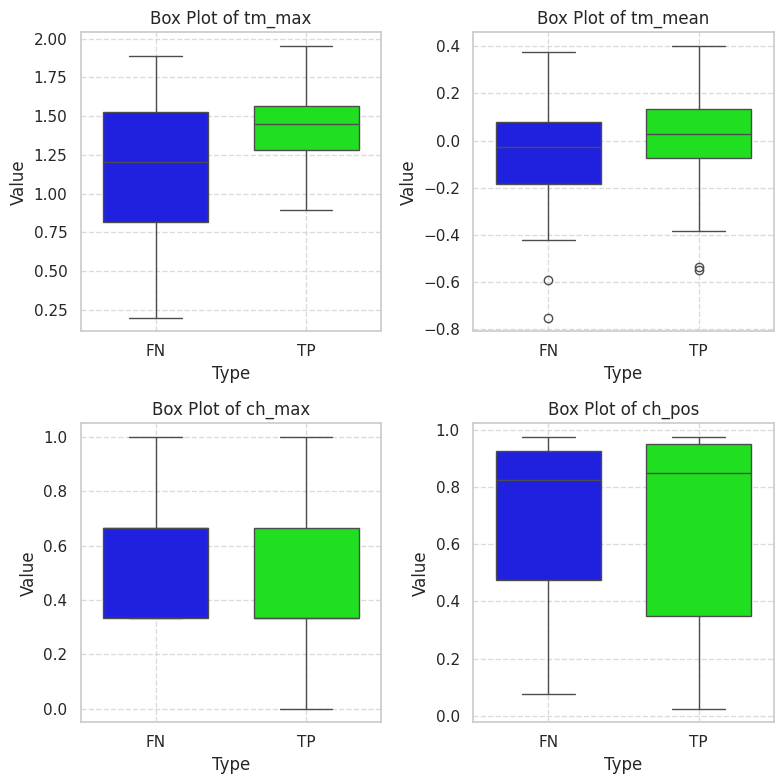

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# Reshape the data for the plots
df_melted = pd.melt(df_box, id_vars=['Type'],
                    value_vars=['tm_max', 'tm_mean', 'ch_max', 'ch_pos'],
                    var_name='Feature', value_name='Value')

features = df_melted['Feature'].unique()
num_features = len(features)

# Set the number of rows and columns for subplots
nrows = 2
ncols = 2

# Create the plots
plt.figure(figsize=(8, nrows * 4))

for i, feature in enumerate(features):
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(data=df_melted[df_melted['Feature'] == feature], x='Type', y='Value', palette=custom_palette, hue='Type', width=0.7)

    # Customize each subplot
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('Type')
    plt.ylabel('Value')

    plt.grid(True, linestyle='--', alpha=0.7)  # Customize grid appearance here

# Adjust the spacing between subplots
#plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust these values as needed
plt.tight_layout()
